> # **Name : Abhishek Subhash Swami**

> # **Roll No. 13**

---

# Statistics : Measure of central tendency and dispersion

In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
import statistics

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data=pd.read_csv('/content/drive/MyDrive/Data/SCD.csv')
data.head()

,Unnamed: 0,value,weight
0,0,60000,2.000000
1,1,135000,2.000230
2,2,600000,2.000461
3,3,250000,2.000691
4,4,450000,2.000922


In [3]:
x=data['value']

##Measure of Central Tendency

### Mean
>The mean is the average of a set of numbers. It is calculated by adding up all the numbers in the set and then dividing the sum by the total number of numbers in the set. The mean is often used to represent the central tendency of a dataset, as it gives an idea of where the majority of the data lies.

In [5]:
mean=statistics.mean(x)
mean1=np.mean(x)
print(mean)
print(mean1)

504127.3117511521
504127.3117511521


###Median
>The median is the middle value in a set of numbers that are arranged in order from lowest to highest (or highest to lowest). If there is an odd number of values in the set, the median is simply the middle value. If there is an even number of values, the median is the average of the two middle values. The median is often used as a measure of central tendency when there are extreme values (outliers) in the dataset.

In [6]:
median=statistics.median(x)
median1=np.median(x)

print(median,median1,sep='\n')

350000.0
350000.0


###Mode
>The mode is the value that appears most frequently in a set of numbers. If there is more than one value that appears with the same frequency, the set is said to have multiple modes. The mode is often used to represent the most common value in a dataset.



In [7]:
mode=statistics.mode(x)
print(mode)

300000


In [9]:
# Create an empty dictionary to store the counts of each item
counts = {}

# Loop over the data and count the occurrences of each item
for item in x:
    if item in counts:
        counts[item] += 1
    else:
        counts[item] = 1

# Find the maximum count
max_count = max(counts.values())

# Loop over the counts dictionary and print any items with the maximum count
for item, count in counts.items():
    if count == max_count:
        print(f"Mode={item} with the highest count of {max_count}")


Mode=300000 with the highest count of 162


## Measure of Dispersion

### Standard Deviation
>A measure of the amount of variation or dispersion of a set of data from its mean. It tells you how spread out the data is.

In [10]:
# Calculate the standard deviation using numpy
sd = np.std(x)
print("Standard deviation:", sd)

Standard deviation: 578482.0792187806


In [12]:
#Calculate the standard deviation using formula
sigma = np.sqrt(np.sum((x - np.mean(x))**2) / np.size(x))
print("Standard deviation:", sigma)

Standard deviation: 578482.0792187806


### Variance
>A measure of the average squared deviation of a set of data from its mean. It's the square of the standard deviation.

In [14]:
# Calculate the variance using numpy
variance = np.var(x)
print("Variance:", variance)

Variance: 334641515977.2836


In [13]:
#Calculate the variance using formula
var =np.sum((x - np.mean(x))**2) / np.size(x)
print("Variance :", var)

Variance : 334641515977.2836


### Skewness
>A measure of the asymmetry of a probability distribution. It tells you whether the data is skewed to the left or right or is symmetric. A distribution can be said to be left-skewed (negative skewness), right-skewed (positive skewness), or symmetrical (zero skewness).

- Left-skewed (negative skewness): A left-skewed distribution has a long left tail and is characterized by a majority of the observations falling to the right of the mean. The mean is less than the median, and the skewness value is negative.

- Right-skewed (positive skewness): A right-skewed distribution has a long right tail and is characterized by a majority of the observations falling to the left of the mean. The mean is greater than the median, and the skewness value is positive.

- Symmetrical (zero skewness): A symmetrical distribution has a bell-shaped curve and is characterized by an equal number of observations on either side of the mean. The mean and median are equal, and the skewness value is zero.

Skewness is an important concept in statistics because it can help us to better understand the distribution of a dataset and identify potential outliers or unusual observations.

In [42]:
from scipy.stats import skew, kurtosis, percentileofscore
import matplotlib.pyplot as plt

In [78]:
x=np.array([0,5,10,15,17,20,23,25,30,40,65,70,75,85,87,87,89,95,80,76])
y=np.linspace(1,20,20)

In [79]:
# Calculate the skewness using formula
skew = np.sum(pow((x - np.mean(x)),3)) / ((np.size(x) - 1) * pow(np.sqrt(np.sum((x - np.mean(x))**2) / np.size(x)),3))
print("Skewness:", round(skew,2))
if skew>0:
  print("Right Skew")
elif skew<0:
  print("Left Skew")
else:
  print('Normal Distribution')

print(f'Mean={statistics.mean(x)}\nMedian={statistics.median(x)}\nMode={statistics.mode(x)}')

Skewness: -0.07
Left Skew
Mean=49
Median=52.5
Mode=87


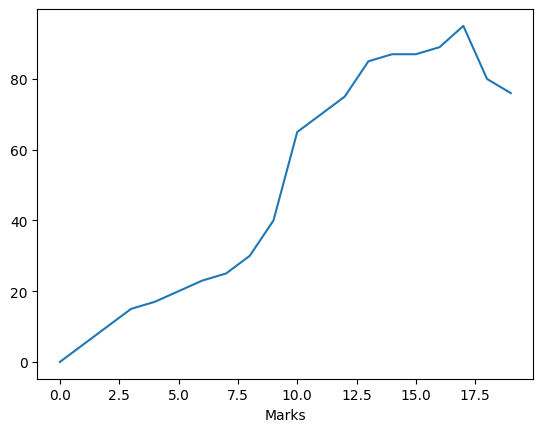

In [90]:
from scipy.signal import savgol_filter
plt.plot(x)
plt.xlabel('Marks')
plt.show()

>As data points are more concentrated on right side and flat towards right side, it is a left skew

### Kurtosis
>A Kurtosis is a measure of the "peakedness" of a probability distribution. It tells us how much of the data is concentrated around the mean, relative to the tails. There are three types of kurtosis curves:

- Leptokurtic: A leptokurtic distribution has a higher peak than a normal distribution, indicating that the data is more concentrated around the mean, with heavier tails. This results in a kurtosis value greater than 3.

- Mesokurtic: A mesokurtic distribution has a similar shape to a normal distribution, with a moderate peak and tails that are not too heavy or too light. This results in a kurtosis value of 3.

- Platykurtic: A platykurtic distribution has a lower peak than a normal distribution, indicating that the data is less concentrated around the mean, with lighter tails. This results in a kurtosis value less than 3.

>The kurtosis curve is an important concept in statistics as it provides information about the shape of a distribution and how the data is spread around the mean. Understanding kurtosis can help us to identify potential outliers or unusual observations in a dataset and make more informed decisions about data analysis and modeling.

In [81]:
# Calculate the kurtosis using scipy
kurtosis_val = kurtosis(x)
print("Kurtosis:", kurtosis_val+3)

Kurtosis: 1.3365026184989546


In [83]:
#calculate Kurtosis using formula
#u4 and sigma4
def kirtosis(arr):
    u4=np.sum(np.power(arr-np.mean(arr),4))
    s4=np.power(np.sqrt(np.sum(np.power(arr-np.mean(arr),2)/arr.size)),4)
    return u4/(arr.size*s4)

print(kurtosis(x)+3)

1.3365026184989546


### Percentile
>A measure used to indicate the value below which a given percentage of observations in a group of observations falls. For example, the 75th percentile is the value below which 75% of the data falls.

In [84]:
# Calculate the percentile score of 7 using scipy
percentile = percentileofscore(x, 7)
print("Percentile of score 7:", percentile)

Percentile of score 7: 10.0


### Quartile
>A measure used to divide a group of observations into four parts or quarters. The first quartile (Q1) represents the 25th percentile, the second quartile (Q2) represents the 50th percentile (also known as the median), and the third quartile (Q3) represents the 75th percentile.

In [87]:
# Calculate the quartiles using numpy
quartiles = np.percentile(x, [25, 50, 75])
print("1st Quartile:", quartiles[0])
print("2nd Quartile:", quartiles[1])
print("3rd Quartile:", quartiles[2])

1st Quartile: 19.25
2nd Quartile: 52.5
3rd Quartile: 81.25
